   Play Tennis  Outlook_Overcast  Outlook_Rain  Outlook_Sunny  \
0            0               0.0           0.0            1.0   
1            0               0.0           0.0            1.0   
2            1               1.0           0.0            0.0   
3            1               0.0           1.0            0.0   
4            1               0.0           1.0            0.0   

   Temperature_Cool  Temperature_Hot  Temperature_Mild  Humidity_High  \
0               0.0              1.0               0.0            1.0   
1               0.0              1.0               0.0            1.0   
2               0.0              1.0               0.0            1.0   
3               0.0              0.0               1.0            1.0   
4               1.0              0.0               0.0            0.0   

   Humidity_Normal  Wind_Strong  Wind_Weak  
0              0.0          0.0        1.0  
1              0.0          1.0        0.0  
2              0.0          0.0    

[Text(0.5555555555555556, 0.9, 'Outlook_Overcast <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(0.4444444444444444, 0.7, 'Humidity_High <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = No'),
 Text(0.2222222222222222, 0.5, 'Outlook_Rain <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.3333333333333333, 0.3, 'Wind_Strong <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.6666666666666666, 0.5, 'Wind_Weak <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.7777777777777778, 0.3, 'Outlook_Sunny <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass

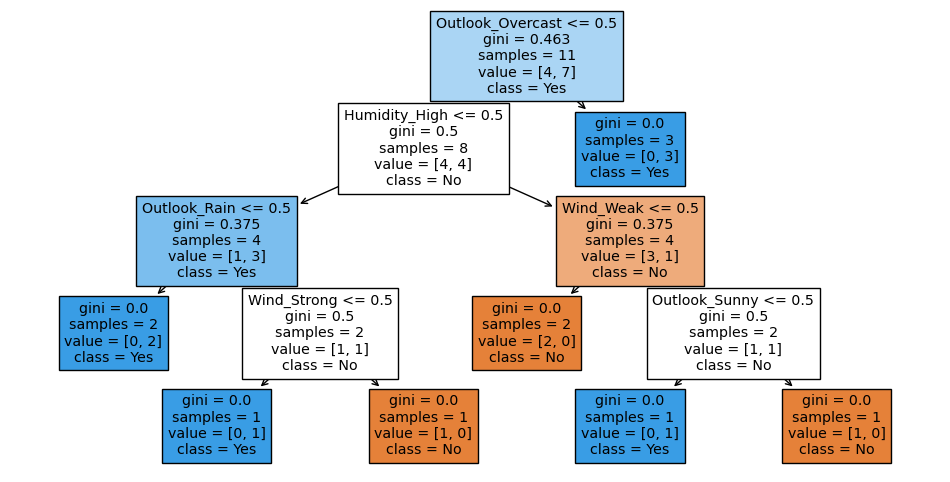

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Create the Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode the categorical variables
category_columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# One hot encode the categorical variables
# sparse_output=False will return a dataframe instead of a sparse matrix
# transform="pandas" will return a dataframe instead of a numpy array
enc= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

one_hot_encoded = enc.fit_transform((df[category_columns]))
#print(one_hot_encoded)

# Drop the original categorical columns and replace them with the one hot encoded columns
df = pd.concat([df, one_hot_encoded], axis=1).drop(columns=category_columns)

""" 
# Another way to encode the input variables
df = pd.get_dummies(df, prefix=['Outlook'], columns = ['Outlook'], drop_first=True)
df = pd.get_dummies(df, prefix=['Temperature'], columns = ['Temperature'], drop_first=True)
df = pd.get_dummies(df, prefix=['Humidity'], columns = ['Humidity'], drop_first=True)
df = pd.get_dummies(df, prefix=['Wind'], columns = ['Wind'], drop_first=True) 
"""

# Encode the target variable
le = LabelEncoder()
df['Play Tennis'] = le.fit_transform(df['Play Tennis'])

# Print the preprocessed dataset
print(df.head())

# Split the dataset into training and testing sets
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
